# Conceptual Design Sizing

## Main Sizing


====== Parameters =======
wingspan: 1.524 m, chord: 0.381 m
area: 0.580644 m^2, aspect ratio: 4.0
ducks: 7, pucks: 1, m2 lap: 5.0
banner length: 6, m3 laps: 4.0 
====== Mission two performance =======
 Mission two score: 1.0294332901793757, mass: 3.067374277094064 kg, net_income: 135.39313482512782
total energy needed for m2: 34.33143893531894 W*hr
wing loading: 51.82339205828833 N/m^2, power loading: 12.076369185616262 W/N
stall speed: 10.174774243489162 m/s, lift off speed: 11.192251667838079 m/s, cruise speed: 18 m/s
======= Mission three performance =======
 Mission three score: 2.9399995087984205, mass: 3.4283042875276744 kg, m3_cost: 1221.9993614379468
total energy needed for m3: 98.1851582076658 W*hr
wing loading: 57.921316780413626 N/m^2, power loading: 54.70839977879738 W/N
stall speed: 10.756750049701116 m/s, lift off speed: 11.832425054671228 m/s, cruise speed: 13 m/s
======= Overall performance =======
motor power: 1415.8296572819522 W, battery power: 1839.93457736446 W
tot

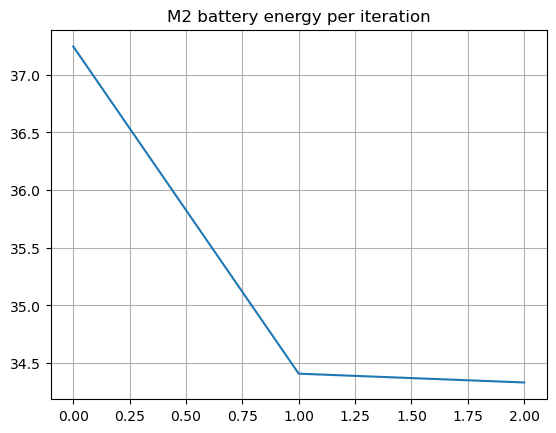

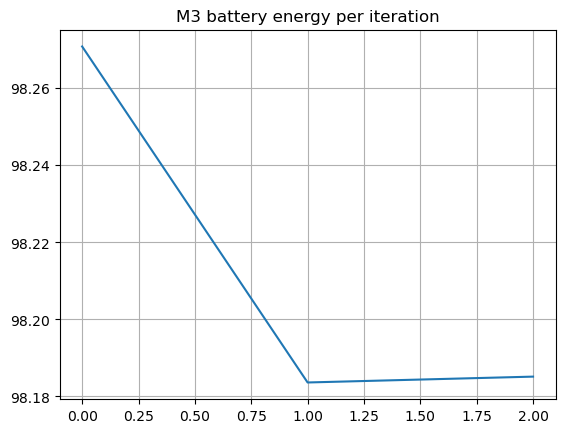

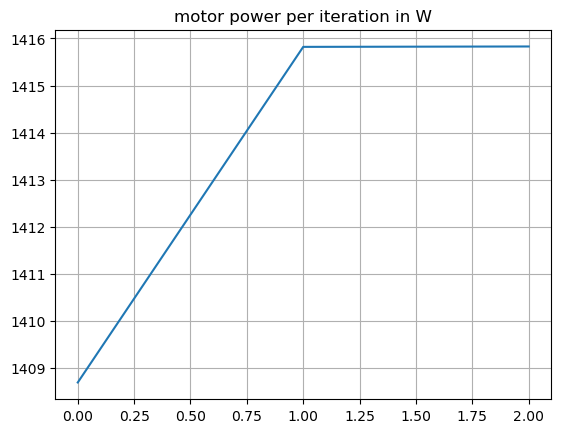

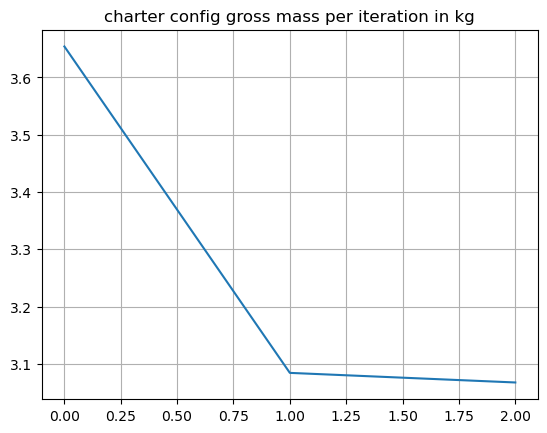

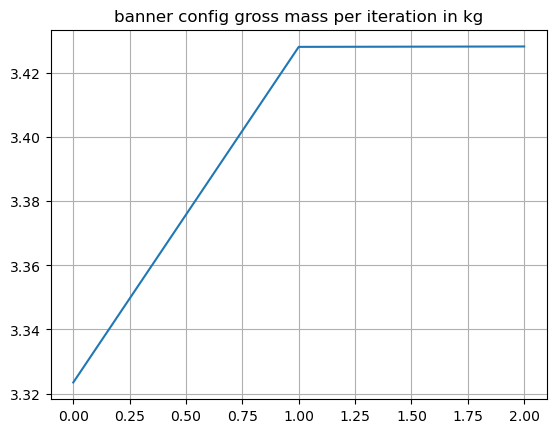

In [17]:
from constraint_analysis.sizing import aircraft
import numpy as np
import yaml
import matplotlib.pyplot as plt
import pandas as pd

conditions = { 'altitude asl':397,'cruise altitude agl':10}
aircraft_design_parameters = {'aspect ratio' : 4,'wing span':1.524,'CLmax':0.85,'CDmin_no_fuselage':0.04,'fineness ratio':6,'m2 bank angle':np.pi/4, 'm3 bank angle': np.pi/4}
aircraft_design_parameters['conditions'] = conditions
mission_parameters = {'cargo':1,'ducks':7,'mission two cruise speed': 18,'banner length':6,'mission three cruise speed':13,'banner aspect ratio':5}
course_parameters = {'ground run': 20,'time limit': 300,'length of straights': 304.8 }
initial_guess = {'motor mass': 0.1,'m2 battery mass': 0.8,'m3 battery mass':0.5}

my_plane=aircraft(aircraft_design_parameters, mission_parameters, course_parameters, initial_guess)

my_plane.size_aircraft_all_missions(show_summary=True, debug_text=False)

print('\n\n')
# print(my_plane.eff_system_cruise)
# print(my_plane.drag_m3_cruise)
# print(my_plane.drag_m3_turn)

print(my_plane.l)
print(my_plane.d)
print(my_plane.mass_m1_gross)
print(my_plane.mass_m2_gross)
print(my_plane.mass_m3_gross) 
print(f'wing: {my_plane.mass_wing}, tail: {my_plane.mass_tail}, landing_gear: {my_plane.mass_landing_gear}, fuselage: {my_plane.mass_fuselage}, motor: {my_plane.mass_motor}, m2_battery: {my_plane.mass_m2_battery}, m3_battery: {my_plane.mass_m3_battery}')  
print(my_plane.mass_banner)

## Tail Sizing


0.580644 0.381 1.524


Text(0.5, 1.0, 'Tail Arm Length vs Boom Radius')

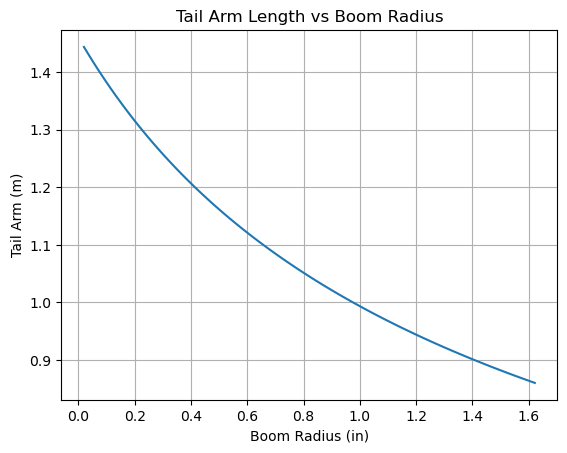

In [27]:
def size_tail_arm(V_ht, V_vt, r_boom):
    """ Size tail arm to reduce wetted drag from boom 
    S_wet_tube = 2*pi*r_boom*l_tail
    assume the boom star """
    l_fus_aft_te = 0.1
    S_wet_fus = my_plane.wing_chord * 3/4 * my_plane.d * 4 + np.pi*(my_plane.d + 2*r_boom)*l_fus_aft_te
    l_tail = np.sqrt(2*my_plane.wing_area*(V_ht*my_plane.wing_chord + V_vt*my_plane.wing_wingspan) / (S_wet_fus + 2*np.pi*r_boom))
    return l_tail
print(my_plane.wing_area, my_plane.wing_chord, my_plane.wing_wingspan)
with open('docs/tail_volumes.yaml', 'r') as file:
    tail_data = yaml.safe_load(file)

V_ht_avg = np.mean(tail_data[2020]['horizontal'])
V_vt_avg = np.mean(tail_data[2020]['vertical'])

r_min = 0.0254*0.039/2
r_max = 0.0254*3.244/2
r_boom_arr = np.linspace(r_min, r_max, 100)
l_tail_arr = size_tail_arm(V_ht_avg, V_vt_avg, r_boom_arr)

plt.plot(r_boom_arr/0.0254, l_tail_arr)
plt.xlabel('Boom Radius (in)')
plt.ylabel('Tail Arm (m)')
plt.title('Tail Arm Length vs Boom Radius')

